# Problem and Data


## Anomaly Detection on Taxi Calls

**We are contacted by a Taxi company:**

<center><img src="assets/sized-yellow-taxi.jpg" width="70%"/></center>

## Anomaly Detection on Taxi Calls

**They have historical data about taxi calls in NYC**

* In particular, they recorded the number of calls
* ...Over regular time intervals

**A major decision for the company is choosing the size of the car pool**

* This depends on how many calls are expected
* ...So, we'd like to figure that out

**Moreover, sometimes the number of calls deviates from the usual patterns**

* The company is interested in detecting such "anomalies"
* ...And anticipating them, if possible

> **We will focus on the task of detecting anomalies**

<div class=big>How would you start to tackle this problem?</div>

## Getting Started

**A couple of good ideas:**

_Talking to the customer_ to understand:

* Their priorities
* How their business works
* Any expectation on the data
* ...

...And also _inspecting the data_

* ...So that we get a "feel" of how it works
* Formally: until we understand better its _statistical distribution_

**Doing both these things _early_ is always a good idea**

## Basic Setup

**Let us start by setting up the notebook:**

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib widget

Our module contains a pre-built function to load the data:

```python
def load_series(file_name, data_folder):
    ...
```

* We will use data from the [Numenta Anomaly Benchmark (NAB)](https://github.com/numenta/NAB)
* NYC taxi data `nyc_taxi.csv` is in the `data/realKnownCause` folder

In [2]:
from util import util # Import our submodule
data_folder = '../data/nab'
file_name = 'realKnownCause/nyc_taxi.csv'
data, labels, windows = util.load_series(file_name, data_folder)

## A Look at the Data

**Let's have a look at all the data we loaded**

In [3]:
data.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


* `data` is a pandas `DataFrame` object
* It is essentially a _table_, in this case representing a _time series_
* There are well defined _column names_ (here "value")
* There is a well defined row _index_ (here "timestamp")
* Jupyter displays DataFrame objects as HTML tables

## Time Series and Pandas

**Our data is a _time series_**

I.e. a sequence whose index represents time

* Specifically, we have a _univariate_ time series...
* ...Since we are tracking only quantity (i.e. one variable)

**Times series have one difference w.r.t. classical table datasets**

* ...I.e. their row index is _meaningful_
* Since it represents the _position_ of the example in the sequence

**That said, we do not care about _how_ time is represented**

* Hence, time series are stored _just as usual_!
* Their peculiarities arise when we start to manipulate them

## Time Series and Pandas

**In pandas:**

* Time series are stored as usual, via `DataFrame` or `Series` objects
* ...You just need to pay more attention to the index

**It _may_ be convenient using a `datetime` index**

* A `datetime` object in python allows to manipulate dates/hours directly
  - E.g. get year/month/day/hour/minute...
* In pandas they can be used as indices, so that for example:
  - Time stamps are easier to read
  - We can sort rows by time
  - We can represent arbitrarily long gaps between measurements
  - ...

That said, we still deal with normal `DataFrame` or `Series` objects

## A Look at the Data

**Let's have a look at all the data we loaded**

Our module contains a function to plot NAB series:

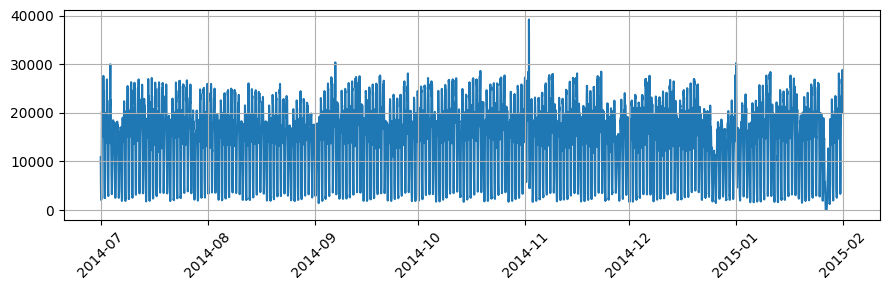

In [4]:
util.plot_series(data)

* If are curious, you can look up the [function code in the module](util/nab.py)

## A Look at the Data

**Let's have a look at all the data we loaded**

We can now move to other data structures

In [5]:
labels.head()

0   2014-11-01 19:00:00
1   2014-11-27 15:30:00
2   2014-12-25 15:00:00
3   2015-01-01 01:00:00
4   2015-01-27 00:00:00
dtype: datetime64[ns]

**`labels` is a pandas `Series` object**

* Similar to a 1D array
* ...But with a well defined row _index_

**This series contains the _timestamp of all known anomalies_**

* They are all hand-labeled

## A Look at the Data

**Let's have a look at all the data we loaded**

Let's plot both the series and the labels:

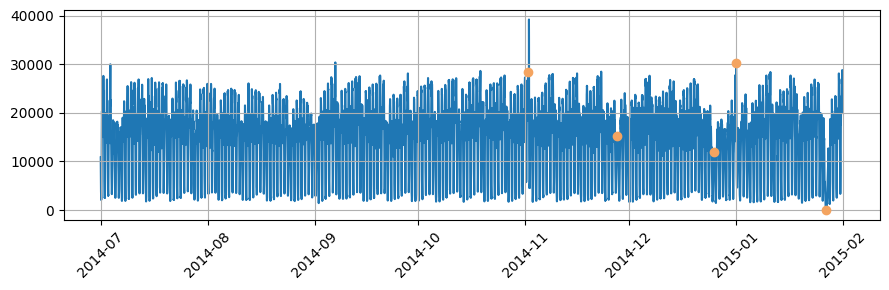

In [7]:
util.plot_series(data, labels)

* Anomalies occur rarely (which is typical for this kind of problem)

## A Look at the Data

**Let's have a look at all the data we loaded**

Now the "windows" data structure:

In [8]:
windows.head()

,begin,end
0,2014-10-30 15:30:00,2014-11-03 22:30:00
1,2014-11-25 12:00:00,2014-11-29 19:00:00
2,2014-12-23 11:30:00,2014-12-27 18:30:00
3,2014-12-29 21:30:00,2015-01-03 04:30:00
4,2015-01-24 20:30:00,2015-01-29 03:30:00


**`windows` is a pandas `DataFrame` object**

* Contains the start/end of windows containing anomalies
* They represent a suitable "resolution" for detecting anomalies
* Reporting the presence of anomalies at any point of the window...
* ...Has some value for the company

## A Look at the Data

**Let's have a look at all the data we loaded**

Let's plot the series, the labels, and the windows all together:

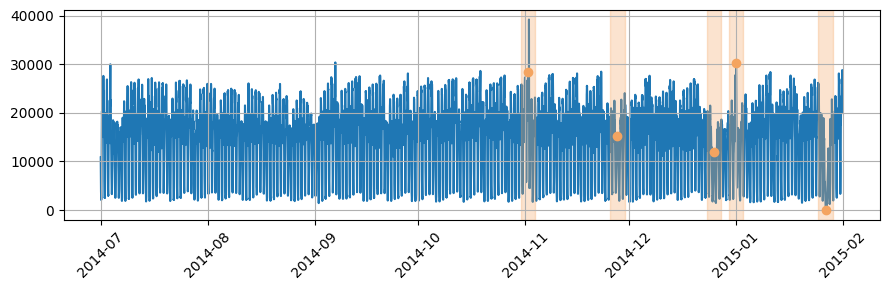

In [10]:
util.plot_series(data, labels, windows)

* Detections that occur too early/late count as misses 